In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [29]:
df = pd.read_csv("dataset.csv")

In [30]:
print("Initial Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isna().sum())

Initial Dataset Overview:
   Roll_No.    Name  FE Score  SE Score Placement Department
0         1  Sukesh       8.0       8.0        No         IT
1         2  Sukesh       9.0       6.0        No         IT
2         3  Haresh       7.0       9.0       Yes         CS
3         4  Sukesh       8.0       7.0       Yes         IT
4         5  Haresh      10.0       0.0        No      AI&DS

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Roll_No.    201 non-null    int64  
 1   Name        201 non-null    object 
 2   FE Score    191 non-null    float64
 3   SE Score    192 non-null    float64
 4   Placement   201 non-null    object 
 5   Department  201 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 9.6+ KB
None

Missing Values:
Roll_No.       0
Name           0
FE Score      10
SE Score       9
Placement

In [32]:
df['FE Score'] = df['FE Score'].fillna(df['FE Score'].median())

In [33]:
df['SE Score'] = df['SE Score'].fillna(df['SE Score'].mode()[0])

In [34]:
df['Placement'] = df['Placement'].fillna(df['Placement'].mode()[0])

In [35]:
print("\nAfter handling missing values:")
print(df.isna().sum())


After handling missing values:
Roll_No.      0
Name          0
FE Score      0
SE Score      0
Placement     0
Department    0
dtype: int64


Text(0.5, 1.0, 'FE_Score Boxplot')

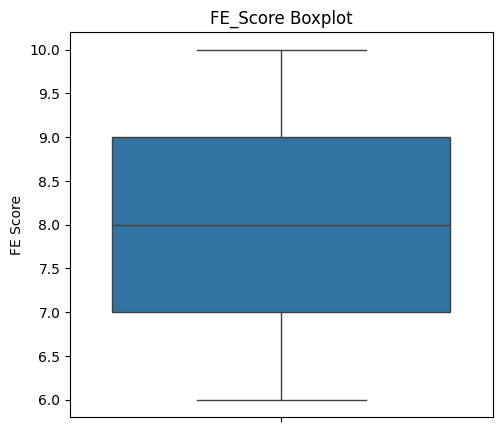

In [36]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(df["FE Score"])
plt.title("FE_Score Boxplot")

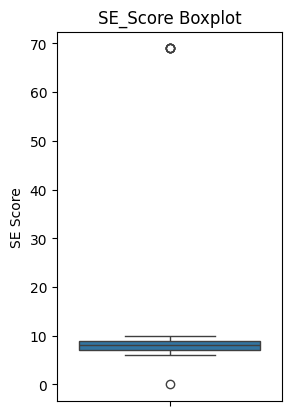

In [38]:
plt.subplot(1, 2, 2)
sns.boxplot(df["SE Score"])
plt.title("SE_Score Boxplot")
plt.show()

In [39]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [41]:
print("\nFE_Score Outliers:")
print(detect_outliers("FE Score"))
print("\nSE_Score Outliers:")
print(detect_outliers("SE Score"))


FE_Score Outliers:
Empty DataFrame
Columns: [Roll_No., Name, FE Score, SE Score, Placement, Department]
Index: []

SE_Score Outliers:
     Roll_No.    Name  FE Score  SE Score Placement Department
4           5  Haresh      10.0       0.0        No      AI&DS
7           8  Sukesh       8.0      69.0        No      AI&DS
24         25  Ramesh       7.0      69.0       Yes         IT
30         31  Ramesh       7.0      69.0        No      AI&DS
156       157  Suresh       8.0      69.0       Yes         CS
159       160  Suresh       8.0      69.0        No         IT


In [42]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Remove outliers from both columns sequentially
df_clean = remove_outliers(df, "FE Score")
df_clean = remove_outliers(df_clean, "SE Score")

In [44]:
scaler = MinMaxScaler()
df_clean[["FE Score", "SE Score"]] = scaler.fit_transform(
    df_clean[["FE Score", "SE Score"]]
)

In [45]:
le = LabelEncoder()
df_clean["Department"] = le.fit_transform(df_clean["Department"])

In [46]:
df_clean.head()

,Roll_No.,Name,FE Score,SE Score,Placement,Department
0,1,Sukesh,0.50,0.50,No,2
1,2,Sukesh,0.75,0.00,No,2
2,3,Haresh,0.25,0.75,Yes,1
3,4,Sukesh,0.50,0.25,Yes,2
5,6,Haresh,0.00,0.25,Yes,2
